# Downloading the Kaggle Dataset into our environment
Data file used for exploration: city_day.csv

In [1]:
! pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73058 sha256=5cef041603c2020d0ed4a6cd4988c81b4d7810c654e9d973baf766b48e2c3cca
  Stored in directory: c:\users\hi\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download rohanrao/air-quality-data-in-india -f city_day.csv

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! mkdir dataset

In [ ]:
from zipfile import ZipFile
import os

# New section

In [ ]:
# Extracting zip file downloaded from KAggle 
 
file_path = os.path.join('city_day.csv.zip')
with ZipFile(file_path) as csv_file:
  csv_file.extractall(os.path.join('dataset'))

FileNotFoundError: ignored

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Loading Dataset into pandas Dataframe

dataset_directory = os.path.join('dataset')
csv_path = dataset_directory + '/city_day.csv'
data = pd.read_csv(csv_path)
data.head(10)

FileNotFoundError: ignored

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
data['City'].value_counts()

Bengaluru             2009
Ahmedabad             2009
Delhi                 2009
Lucknow               2009
Mumbai                2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
data.skew(axis=0, skipna =True)

PM2.5       3.369960
PM10        2.053189
NO          3.883166
NO2         2.464560
NOx         2.569915
NH3         4.083993
CO          8.878322
SO2         4.083660
O3          1.330119
Benzene    21.304218
Toluene    11.666129
Xylene      7.891515
AQI         3.396757
dtype: float64

Check perecentage of null values

In [ ]:
l1=[]
for i in data.columns:
    l1.append(round((data[i].isnull().sum()/29531)*100))

dt=pd.DataFrame(np.column_stack([data.columns, l1]),columns=['Column', 'Percentage of missing values'])
dt.sort_values(by='Percentage of missing values', ascending=False)

,Column,Percentage of missing values
13,Xylene,61
3,PM10,38
7,NH3,35
12,Toluene,27
11,Benzene,19
14,AQI,16
2,PM2.5,16
15,AQI_Bucket,16
6,NOx,14
10,O3,14


Xylene, Benzene and toluene have high percentage of null values. As Benzene, Toluene and Xylene are petrochemical emissions, a new feature can be created by grouping them.


In [ ]:
data['BTX'] = data[['Benzene','Toluene','Xylene']].sum(axis=1)

In [ ]:
data.head()
data['BTX'].isnull().sum()/29531

0.0

In [ ]:
data=data.drop(['Benzene','Toluene','Xylene'],axis=1);

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN,0.02
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN,12.95
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN,25.45
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN,15.57
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN,28.68


In [ ]:
l2=[]
for i in data.columns:
    l2.append(round((data[i].isnull().sum()/29531)*100))

dt1=pd.DataFrame(np.column_stack([data.columns, l2]),columns=['Column', 'Percentage of missing values'])
dt1.sort_values(by='Percentage of missing values', ascending=False)

,Column,Percentage of missing values
3,PM10,38
7,NH3,35
2,PM2.5,16
11,AQI,16
12,AQI_Bucket,16
6,NOx,14
10,O3,14
9,SO2,13
4,NO,12
5,NO2,12


Filling of PM2.5, NO, NO2, NOx, CO, SO2, O3 null values using mean of each city

In [ ]:
for i in data.columns[2:11]:
    data[i] = data[i].groupby(data["City"]).transform(lambda x: x.fillna(data[i].mean()))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  AQI         24850 non-null  float64       
 12  AQI_Bucket  24850 non-null  object        
 13  BTX         29531 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 3.2+ MB


drop rows that have AQI and AQI_Bucket columns as null values

In [ ]:
#data.dropna(subset = ["AQI", "AQI_Bucket"], inplace= True)

In [ ]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24850 non-null  object        
 1   Date        24850 non-null  datetime64[ns]
 2   PM2.5       24850 non-null  float64       
 3   NO          24850 non-null  float64       
 4   NO2         24850 non-null  float64       
 5   NOx         24850 non-null  float64       
 6   CO          24850 non-null  float64       
 7   SO2         24850 non-null  float64       
 8   O3          24850 non-null  float64       
 9   Benzene     24850 non-null  float64       
 10  Toluene     24850 non-null  float64       
 11  AQI         24850 non-null  float64       
 12  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 2.7+ MB


In [ ]:
data.describe()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,67.475903,17.621678,28.971818,32.290515,2.343536,14.367049,34.899199,3.433371,9.332356,166.463581
std,62.208948,22.245860,24.432587,29.542968,7.011582,17.215237,21.368979,14.851776,18.273322,140.696585
min,0.040000,0.030000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,29.560000,5.720000,12.090000,14.030000,0.590000,5.790000,19.640000,0.340000,1.580000,81.000000
50%,50.165000,10.075000,22.535000,25.720000,0.950000,9.430000,32.060000,1.810000,6.790000,118.000000
75%,79.507500,19.710000,37.910000,38.170000,1.530000,14.890000,45.397500,3.280840,8.700972,208.000000
max,914.940000,390.680000,362.210000,378.240000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000


In [ ]:
data["Year"] = data["Date"].dt.year

In [ ]:
data.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015


Visualizations

In [ ]:
 df2 = data.groupby(["City"])["PM2.5"].sum().reset_index()
df2

,City,PM2.5
0,Ahmedabad,90540.931156
1,Aizawl,1936.190578
2,Amaravati,32169.382890
3,Amritsar,63070.047970
4,Bengaluru,70251.651787
5,Bhopal,13957.610000
6,Brajrajnagar,45625.520981
7,Chandigarh,12665.916935
8,Chennai,94594.603468
9,Coimbatore,10165.870578


Text(0.5, 1.0, 'PM2.5 data of city')

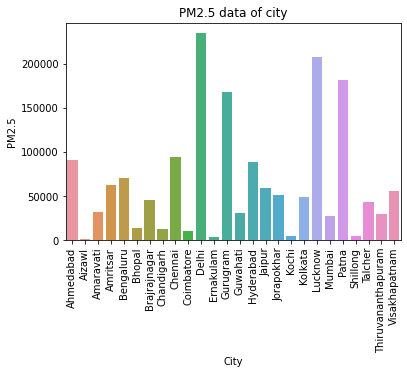

In [ ]:

sns.barplot(x="City", y="PM2.5", data= df2)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.title("PM2.5 data of city")

Plot of AQI and City

In [ ]:
d5 = data.groupby("City")["AQI"].sum().reset_index().sort_values(by="AQI", ascending = False)
d5

,City,AQI
0,Ahmedabad,603132.0
10,Delhi,518716.0
19,Lucknow,412623.0
21,Patna,351301.0
12,Gurugram,327105.0
8,Chennai,215723.0
14,Hyderabad,205310.0
4,Bengaluru,180148.0
15,Jaipur,146245.0
25,Visakhapatnam,137323.0


Text(0.5, 1.0, 'AQI data across 10 cities with highest values of AQI')

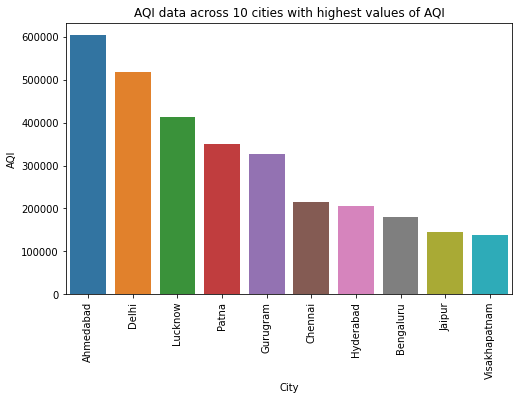

In [ ]:
plt.figure(figsize = (8, 5))
sns.barplot(x="City", y = "AQI", data = d5.head(10))
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.title("AQI data across 10 cities with highest values of AQI")

In [ ]:
df3 = data.groupby("Year")["SO2"].sum().reset_index()
df3

,Year,SO2
0,2015,22069.883955
1,2016,26146.857682
2,2017,39289.710884
3,2018,101881.893474
4,2019,115096.298338
5,2020,52536.511908


Text(0.5, 1.0, 'Total SO2 data in a year for all cities')

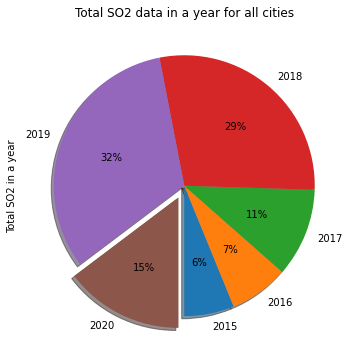

In [ ]:
plt.figure(figsize=(9, 6))
Year = ["2015", "2016", "2017", "2018", "2019", "2020"]
explode =[0, 0, 0, 0, 0, 0.1]
plt.pie("SO2", data = df3, labels= Year, autopct="%.0f%%", shadow = True, startangle = 270, explode = explode)
plt.ylabel("Total SO2 in a year")
plt.title("Total SO2 data in a year for all cities")

There was increase in the emision SO2 from 2015 to 2019


In [ ]:
df4 = data.groupby(["Year"])["O3"].sum().reset_index()
df4

,Year,O3
0,2015,63376.965749
1,2016,99211.603074
2,2017,113518.561697
3,2018,202011.031857
4,2019,236354.240133
5,2020,152772.681884


Text(0.5, 1.0, 'Ozone data for all cities')

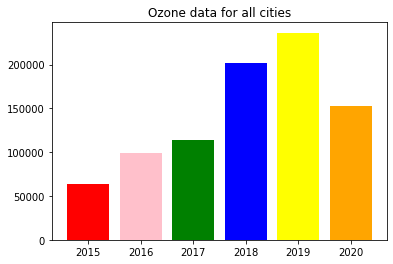

In [ ]:
plt.bar("Year", "O3", data = df4, color = ["red","pink", "green", "blue", "yellow", "orange"])
plt.title("Ozone data for all cities")

There is increase in emission of O3 from 2015-2019

In [ ]:
data["AQI_Bucket"].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

In [ ]:
data["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df2 = data.groupby(["Year", "AQI_Bucket"])["AQI"].count().reset_index()
df2.head()

,Year,AQI_Bucket,AQI
0,2015,Good,27
1,2015,Moderate,756
2,2015,Poor,326
3,2015,Satisfactory,278
4,2015,Severe,145


Text(0.5, 1.0, 'AQI bucket data for all years')

<Figure size 504x432 with 0 Axes>

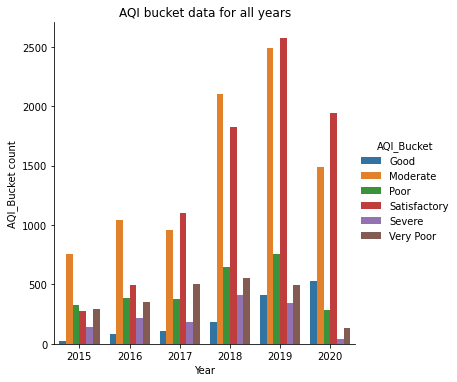

In [ ]:
plt.figure(figsize = (7, 6))
sns.catplot(data= df2, x= "Year", y ="AQI", hue = "AQI_Bucket", kind = "bar")
plt.ylabel("AQI_Bucket count")
plt.title("AQI bucket data for all years")

In [ ]:
df7 = data.groupby(["City", "Year"])["Benzene"].sum().reset_index().sort_values(by="Benzene", ascending = False)
df7.head()

,City,Year,Benzene
85,Shillong,2020,10482.12000
67,Kolkata,2019,5570.22000
3,Ahmedabad,2018,2890.74000
25,Brajrajnagar,2019,2769.19084
74,Lucknow,2020,2238.52000


<Figure size 504x288 with 0 Axes>

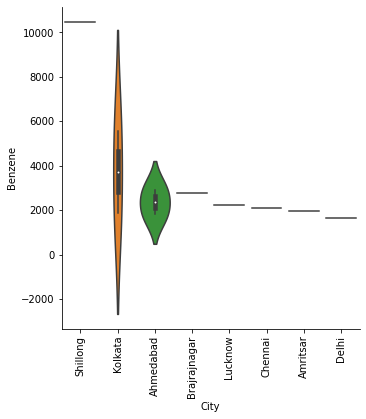

In [ ]:
plt.figure(figsize=(7, 4))
sns.catplot(x="City", y="Benzene", data = df7.head(10), kind = "violin")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.skew()

PM2.5       3.001976
NO          3.545800
NO2         2.456446
NOx         2.496494
CO          8.708375
SO2         4.009550
O3          1.349305
Benzene    23.305374
Toluene    13.007137
AQI         3.396757
Year       -0.547299
dtype: float64

In [ ]:
data.kurtosis()

PM2.5       15.381195
NO          19.424781
NO2         11.227612
NOx          9.364779
CO         105.217286
SO2         21.244010
O3           3.639559
Benzene    629.129375
Toluene    265.788349
AQI         21.423727
Year        -0.640512
dtype: float64

In [ ]:
corr_data = data.corr()
corr_data

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,Year
PM2.5,1.000000,0.456844,0.362218,0.421468,0.092622,0.130575,0.163140,0.020030,0.112113,0.654743,-0.233022
NO,0.456844,1.000000,0.479326,0.790173,0.216717,0.186106,0.017522,0.039324,0.140669,0.450700,-0.029643
NO2,0.362218,0.479326,1.000000,0.613578,0.369363,0.416849,0.288820,0.027488,0.258524,0.535325,-0.084624
NOx,0.421468,0.790173,0.613578,1.000000,0.247272,0.240183,0.090884,0.045408,0.185011,0.474232,-0.013164
CO,0.092622,0.216717,0.369363,0.247272,1.000000,0.494681,0.039616,0.047517,0.272347,0.678351,-0.078119
SO2,0.130575,0.186106,0.416849,0.240183,0.494681,1.000000,0.166166,0.036343,0.285037,0.484797,0.051898
O3,0.163140,0.017522,0.288820,0.090884,0.039616,0.166166,1.000000,0.016874,0.114106,0.193988,-0.040400
Benzene,0.020030,0.039324,0.027488,0.045408,0.047517,0.036343,0.016874,1.000000,0.715393,0.043354,0.039108
Toluene,0.112113,0.140669,0.258524,0.185011,0.272347,0.285037,0.114106,0.715393,1.000000,0.266785,0.058910
AQI,0.654743,0.450700,0.535325,0.474232,0.678351,0.484797,0.193988,0.043354,0.266785,1.000000,-0.192464


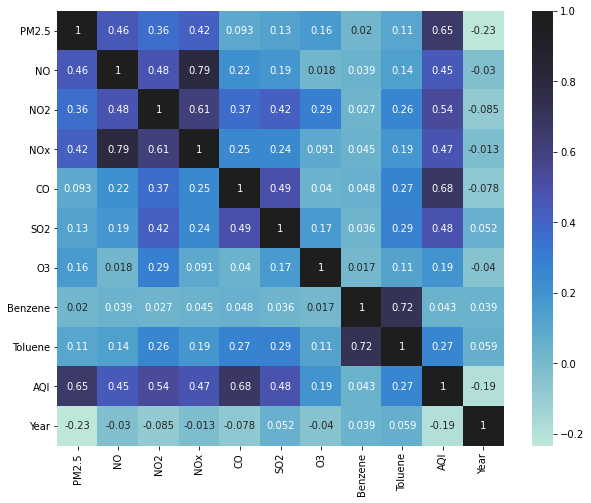

In [ ]:
# Heatmap showing correlation between features

fig = plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(corr_data, annot=True, center=1)
plt.show()

In [ ]:
corr_data['AQI']

PM2.5      0.654743
NO         0.450700
NO2        0.535325
NOx        0.474232
CO         0.678351
SO2        0.484797
O3         0.193988
Benzene    0.043354
Toluene    0.266785
AQI        1.000000
Year      -0.192464
Name: AQI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


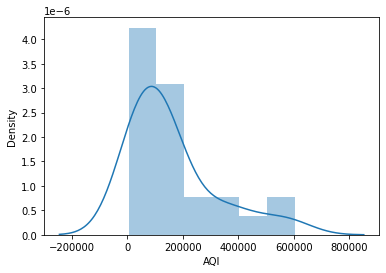

In [ ]:
sns.distplot(d5["AQI"])

Distribution plot across the cities

In [ ]:
d6 = pd.DataFrame(data.groupby("Year")["AQI"].sum()).reset_index()
d6

,Year,AQI
0,2015,388170.0
1,2016,507267.0
2,2017,586883.0
3,2018,1045685.0
4,2019,1106740.0
5,2020,501875.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


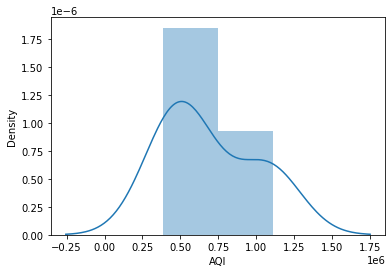

In [ ]:
d6 = pd.DataFrame(data.groupby("Year")["AQI"].sum()).reset_index()
sns.distplot(d6["AQI"])

Distribution plot of the year

Text(0.5, 1.0, 'Bar plot of AQI_Bucket count')

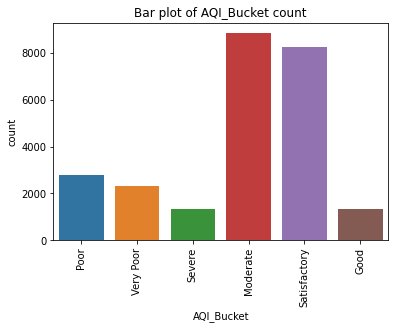

In [ ]:
sns.countplot(x="AQI_Bucket", data = data)
plt.xticks(rotation=90)
plt.title("Bar plot of AQI_Bucket count")

In [ ]:
#data["AQI_Bucket"].replace("Poor", "Poor", inplace = True)
#data["AQI_Bucket"].replace("Very Poor", "Poor", inplace = True)
#data["AQI_Bucket"].replace("Severe", "Poor", inplace = True)
#data["AQI_Bucket"].replace("Moderate", "Moderate", inplace = True)
#data["AQI_Bucket"].replace("Satisfactory", "Good", inplace = True)
#data["AQI_Bucket"].replace("Good", "Good", inplace = True)

Text(0.5, 1.0, 'Bar plot of AQI_Bucket count')

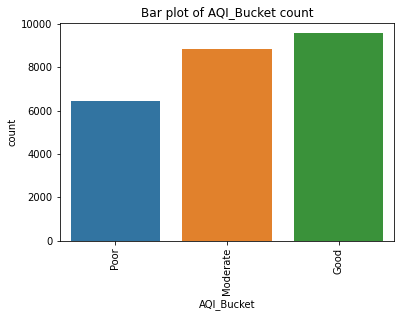

In [ ]:
sns.countplot(x="AQI_Bucket", data = data)
plt.xticks(rotation=90)
plt.title("Bar plot of AQI_Bucket count")

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,NaN,NaN,0.02
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,NaN,NaN,12.95
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,NaN,NaN,25.45
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,NaN,NaN,15.57
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,NaN,NaN,28.68


In [ ]:
np.unique(data.loc[data['AQI_Bucket']=='Poor']['City'].values)

array(['Ahmedabad', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
       'Brajrajnagar', 'Chandigarh', 'Chennai', 'Delhi', 'Gurugram',
       'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi',
       'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Talcher',
       'Thiruvananthapuram', 'Visakhapatnam'], dtype=object)

In [ ]:
np.unique(data.loc[data['AQI_Bucket']=='Moderate']['City'].values)

array(['Ahmedabad', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
       'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi',
       'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'],
      dtype=object)

In [ ]:
np.unique(data.loc[data['AQI_Bucket']=='Good']['City'].values)


array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 
def city_maximum_polution(pollutant):
 
  '''
  function to display maximum pollution of given pollutant in cities
'''
  df = data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
  return df[:10]

In [ ]:
city_maximum_polution('AQI')

,City,AQI
0,Ahmedabad,452.122939
1,Delhi,259.487744
2,Patna,240.782042
3,Gurugram,225.123882
4,Lucknow,217.973059
5,Talcher,172.886819
6,Jorapokhar,159.251621
7,Brajrajnagar,150.280505
8,Kolkata,140.566313
9,Guwahati,140.111111


In [ ]:
city_maximum_polution('PM2.5')

,City,PM2.5
0,Delhi,117.146631
1,Patna,113.815353
2,Gurugram,112.549731
3,Lucknow,107.568277
4,Ahmedabad,67.728234
5,Jorapokhar,66.406088
6,Brajrajnagar,64.726798
7,Kolkata,64.571464
8,Guwahati,63.692929
9,Talcher,62.607920


In [ ]:
city_maximum_polution('CO')

,City,CO
0,Ahmedabad,16.147420
1,Lucknow,2.131976
2,Delhi,1.976053
3,Talcher,1.911862
4,Brajrajnagar,1.870288
5,Bengaluru,1.840878
6,Ernakulam,1.643175
7,Patna,1.591700
8,Jorapokhar,1.358846
9,Gurugram,1.321857


In [ ]:
city_maximum_polution('NO2')

,City,NO2
0,Delhi,50.763057
1,Ahmedabad,49.805675
2,Kolkata,40.032711
3,Patna,36.507494
4,Visakhapatnam,35.728846
5,Lucknow,33.188450
6,Jaipur,32.370143
7,Bhopal,31.258602
8,Coimbatore,28.778153
9,Hyderabad,28.389182


In [ ]:
city_maximum_polution('SO2')

,City,SO2
0,Ahmedabad,42.281148
1,Jorapokhar,27.906317
2,Talcher,25.596562
3,Patna,21.293910
4,Kochi,17.595988
5,Delhi,15.826280
6,Mumbai,14.793356
7,Guwahati,14.664127
8,Amaravati,14.277044
9,Bhopal,13.110511


In [ ]:
city_maximum_polution('BTX')

,City,BTX
0,Shillong,68.759806
1,Ahmedabad,28.408278
2,Kolkata,27.474914
3,Delhi,21.608706
4,Aizawl,17.394248
5,Patna,15.796593
6,Visakhapatnam,14.642059
7,Amritsar,12.096257
8,Hyderabad,10.051466
9,Chandigarh,9.087533


Looking at these charts, It can be concluded that ***Ahmedabad, Delhi and Patna ***have higher pollutant concentrations and higher AQI


# Training the entire data

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(['AQI','AQI_Bucket'],axis=1)
y = data["AQI"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [ ]:
# Helps in data imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
from xgboost import XGBRegressor
gbc=XGBRegressor(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)

In [ ]:
print(mean_absolute_error(pred,y_test))
print(mean_squared_log_error(pred,y_test))
model3.score(X_test,y_test)

# Polution prediction of Ahmedabad

In [ ]:
df_ahm = data.loc[data['City']== 'Ahmedabad']

In [ ]:
df_ahm.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,NaN,NaN,0.02
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,NaN,NaN,12.95
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,NaN,NaN,25.45
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,NaN,NaN,15.57
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,NaN,NaN,28.68


In [ ]:
df_ahm.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,BTX
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2.009000e+03,2009.000000,2009.000000,2009.000000,1334.000000,2009.000000
mean,67.728234,117.409318,20.956815,49.805675,42.914773,2.348348e+01,16.147420,42.281148,37.565152,452.122939,28.408278
std,32.739185,20.608768,18.030998,41.889674,29.023976,2.061087e-13,20.258113,37.926831,18.464239,311.729553,38.518817
min,3.040000,11.500000,0.060000,0.080000,0.000000,2.348348e+01,0.060000,0.520000,0.380000,48.000000,0.000000
25%,46.910000,118.127103,10.380000,28.560659,27.840000,2.348348e+01,2.248598,14.531977,32.100000,231.000000,0.000000
50%,67.450578,118.127103,17.574730,28.560659,32.309123,2.348348e+01,8.510000,23.810000,34.491430,384.500000,19.510000
75%,73.070000,118.127103,23.750000,66.430000,51.030000,2.348348e+01,23.750000,60.680000,45.650000,542.750000,43.320000
max,381.690000,586.270000,175.810000,292.020000,246.030000,2.348348e+01,175.810000,186.080000,162.430000,2049.000000,486.790000


In [ ]:
df_ahm['Year'] = df_ahm['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ahm["Day"] = df_ahm["Date"].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ahm["Month"] = df_ahm["Date"].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ahm = df_ahm.drop('Date',axis=1)
df_ahm = df_ahm.drop('City',axis=1)

In [ ]:
df_ahm.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Year,Day,Month
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,NaN,NaN,0.02,2015,1,1
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,NaN,NaN,12.95,2015,2,1
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,NaN,NaN,25.45,2015,3,1
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,NaN,NaN,15.57,2015,4,1
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,NaN,NaN,28.68,2015,5,1


In [ ]:
df_ahm.isnull().sum()

PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
AQI           675
AQI_Bucket    675
BTX             0
Year            0
Day             0
Month           0
dtype: int64

Filling null values

In [ ]:
d_f1 = df_ahm[['Year','Month','AQI']].copy()
d_f1 = d_f1.groupby(['Year','Month']).mean()
d_f1

AQI
Year Month            
2015 1      350.333333
     2      520.640000
     3      418.571429
     4      308.640000
     5      263.466667
...                ...
2020 3      277.466667
     4      120.733333
     5      128.677419
     6       97.357143
     7      119.000000

[67 rows x 1 columns]

In [ ]:
df_ahm['AQI'].fillna((df_ahm['AQI'].mean()), inplace=True)

In [ ]:
df_ahm

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX,Year,Day,Month
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,452.122939,NaN,0.02,2015,1,1
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,452.122939,NaN,12.95,2015,2,1
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,452.122939,NaN,25.45,2015,3,1
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,452.122939,NaN,15.57,2015,4,1
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,452.122939,NaN,28.68,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,62.120000,118.670000,9.18,56.35,19.86,23.483476,0.49,12.44,68.05,92.000000,Satisfactory,40.70,2020,27,6
2005,31.570000,118.127103,6.37,23.99,16.40,23.483476,0.52,11.01,26.34,82.000000,Satisfactory,52.29,2020,28,6
2006,29.750000,127.980000,9.06,25.15,18.92,23.483476,0.67,12.10,34.99,74.000000,Satisfactory,62.39,2020,29,6
2007,40.020000,121.100000,7.09,58.92,33.41,23.483476,0.73,16.39,41.64,98.000000,Satisfactory,46.66,2020,30,6


In [ ]:
df_ahm.shape

(2009, 15)

In [ ]:
#splitting data

X_train1 = df_ahm[:1461]
y_train1 = X_train1['AQI']
X_train1=X_train1.drop(['AQI','AQI_Bucket'],axis=1)
X_test1 = df_ahm[1461:]
y_test1 = X_test1['AQI']
X_test1=X_test1.drop(['AQI','AQI_Bucket'],axis=1)

In [ ]:
X_train1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,BTX,Year,Day,Month
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.02,2015,1,1
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,12.95,2015,2,1
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,25.45,2015,3,1
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,15.57,2015,4,1
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,28.68,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,80.140000,118.127103,86.91,71.98,65.41,23.483476,86.91,64.70,47.86,43.39,2018,27,12
1457,89.140000,118.127103,63.43,81.71,55.88,23.483476,63.43,70.00,44.86,43.37,2018,28,12
1458,68.290000,118.127103,16.94,82.74,29.12,23.483476,16.94,61.27,51.76,43.31,2018,29,12
1459,67.750000,118.127103,17.63,81.78,29.28,23.483476,17.63,57.37,63.34,43.35,2018,30,12


In [ ]:
X_test1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,BTX,Year,Day,Month
1461,110.71,118.127103,63.03,111.56,100.04,23.483476,63.03,80.15,57.12,43.34,2019,1,1
1462,147.57,118.127103,59.56,107.46,129.87,23.483476,59.56,47.70,48.23,43.43,2019,2,1
1463,131.50,118.127103,119.68,75.82,88.04,23.483476,119.68,55.29,43.25,43.51,2019,3,1
1464,102.12,118.127103,57.92,95.29,54.93,23.483476,57.92,69.02,51.71,43.45,2019,4,1
1465,115.00,118.127103,63.86,111.04,61.99,23.483476,63.86,86.65,59.25,43.52,2019,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,62.12,118.670000,9.18,56.35,19.86,23.483476,0.49,12.44,68.05,40.70,2020,27,6
2005,31.57,118.127103,6.37,23.99,16.40,23.483476,0.52,11.01,26.34,52.29,2020,28,6
2006,29.75,127.980000,9.06,25.15,18.92,23.483476,0.67,12.10,34.99,62.39,2020,29,6
2007,40.02,121.100000,7.09,58.92,33.41,23.483476,0.73,16.39,41.64,46.66,2020,30,6


Applying random forest regressor


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train1,y_train1)
y_pred1 = model1.predict(X_test1)

print(mean_absolute_error(y_pred1,y_test1))
print(mean_squared_log_error(y_pred1,y_test1))
print(model1.score(X_test1,y_test1))

114.79941986123725
0.16217119922357595
0.6770586269356758


Applying Gradient boost regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor()
model2.fit(X_train1,y_train1)
y_pred2 = model2.predict(X_test1)

print(mean_absolute_error(y_pred2,y_test1))
print(mean_squared_log_error(y_pred2,y_test1))
print(model2.score(X_test1,y_test1))

109.81957580661674
0.14821920761842294
0.6846040364665213


Applying extra trees regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model3=ExtraTreesRegressor(min_samples_leaf= 6, min_samples_split= 8, n_estimators= 100)
model3.fit(X_train1,y_train1)
y_pred3 = model3.predict(X_test1)

print(mean_absolute_error(y_pred3,y_test1))
print(mean_squared_log_error(y_pred3,y_test1))
model3.score(X_test1,y_test1)

117.99835281215549
0.18814340215502814


0.6794884098516819

# Retrieving Dataset directly from the web
To enable us access our dataset on the go, I have written this short code to retrieve our dataset driectly into our colab environment.

In [ ]:
# import libraries to retrieve the dataset
import os
import numpy as np
from six.moves import urllib
import pandas as pd

In [ ]:
# creates directory to store retrieved dataset

dataset_url = "https://raw.githubusercontent.com/ShubhankarRawat/India---Air-Quality-Analysis/master/dataset.csv"

dataset_path = os.path.join('dataset')

if not os.path.isdir(dataset_path):
    os.mkdir(dataset_path)

In [ ]:
# Retrieves dataset from the provided link

def retrieve_data(path, url):
    csv_file = os.path.join(path, "dataset.csv")
    urllib.request.urlretrieve(url, csv_file)

In [ ]:
retrieve_data(path=dataset_path, url=dataset_url)

In [ ]:
# loading dataset with pandas

csv_path = dataset_path + '/dataset.csv'
df = pd.read_csv(csv_path, encoding='cp1252', low_memory=False)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


The dataset contains the following features :

stn_code : Station code. A code given to each station that made the measurements.

sampling_date : The date when the data was recorded.

state : It represents the states whose air quality data is measured.

location : It represents the city whose air quality data is measured.

agency : Name of the agency that measured the data.

type : The type of area where the measurement was made.

so2 : The amount of Sulphur Dioxide measured.

no2 : The amount of Nitrogen Dioxide measured.

rspm : Respirable Suspended Particulate Matter measured.

spm : Suspended Particulate Matter measured.

location_monitoring_station : It indicates the location of the monitoring area.

pm2_5 : It represents the value of particulate matter measured.

date : It represents the date of recording (It is cleaner version of 'sampling_date' feature)

In [ ]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64